# Validation Testing FancyImpute KNN Points

In [3]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [6]:
#add more rows, pit data doesnt matter

df = pd.read_csv('project2_KNN_v1.csv')
df.shape

(259, 26)

In [7]:
def stripp(row):
    columns_clean = []
    for string in row:   
        columns_clean.append(string.lower())
    return columns_clean

In [8]:
df.columns

Index(['Unnamed: 0', 'grid3', 'positionorder3', 'points3', 'fastestlap3',
       'fastestlapspeed3', 'qposition3', 'meanlaptime3', 'fastlaptime3',
       'grid1', 'positionorder1', 'points1', 'fastestlap1', 'fastestlapspeed1',
       'qposition1', 'meanlaptime1', 'fastlaptime1', 'grid2', 'positionorder2',
       'points2', 'fastestlap2', 'fastestlapspeed2', 'qposition2',
       'meanlaptime2', 'fastlaptime2', 'championship_points'],
      dtype='object')

In [9]:
del df['Unnamed: 0']

In [41]:
# columns = ['grid3', 'positionorder3', 'points3', 'fastestlap3', 'fastestlapspeed3',
#        'qposition3', 'meanlaptime3', 'fastlaptime3', 'pos3', 'grid1',
#        'positionorder1', 'points1', 'fastestlap1', 'fastestlapspeed1',
#        'qposition1', 'meanlaptime1', 'fastlaptime1', 'pos1', 'grid2',
#        'positionorder2', 'points2', 'fastestlapspeed2', 'qposition2',
#        'meanlaptime2', 'fastlaptime2', 'pos2', 'points2.1']

In [ ]:
#results from Third Lasso 
[('grid3', -0.0),
 ('positionorder3', -2.810245960905237),
 ('points3', 18.2756399466426),
 ('fastestlap3', -1.5523447512126671),
 ('fastestlapspeed3', -0.0),
 ('qposition3', -3.9982106441810097),
 ('meanlaptime3', -0.0),
 ('fastlaptime3', 0.0),
 ('grid1', -7.600246462262034),
 ('positionorder1', 2.843838615200502),
 ('points1', 20.236904761131292),
 ('fastestlap1', 9.88653131037434),
 ('fastestlapspeed1', -27.052323213143154),
 ('qposition1', -4.752167119652307),
 ('meanlaptime1', -29.404817599211345),
 ('fastlaptime1', 5.522146725587358),
 ('grid2', -0.0),
 ('positionorder2', -0.722654737317537),
 ('points2', 28.940704455600212),
 ('fastestlap2', 2.207375605078907),
 ('fastestlapspeed2', -0.2002376455514979),
 ('qposition2', -3.911843634928584),
 ('meanlaptime2', 2.6330110332413312),
 ('fastlaptime2', 1.0285480070305186)]

In [ ]:
#results from second Lasso
# [('grid3', -0.0),
#  ('positionorder3', -2.8048291290740455),
#  ('points3', 18.284532336533612),
#  ('fastestlap3', -1.556703912954679),
#  ('fastestlapspeed3', -4.011497298805268),
#  ('qposition3', 0.0),
#  ('meanlaptime3', -7.6016178967745285),
#  ('fastlaptime3', 2.852369274603058),
#  ('grid1', 20.254115116613118),
#  ('positionorder1', 9.901987253800128),
#  ('points1', -27.102761449293475),
#  ('fastestlap1', -4.7349174888960155),
#  ('fastestlapspeed1', -29.39632291425602),
#  ('qposition1', 5.492329754783002),
#  ('meanlaptime1', -0.7366033280550396),
#  ('fastlaptime1', 28.93724483506633),
#  ('grid2', 2.1944306552167676),
#  ('positionorder2', -3.8930435168537634),
#  ('points2', 2.639315009691421),
#  ('fastestlap2', 1.199420487343717)]

In [ ]:
#results from first Lasso run
# [('grid3', -0.7486920151333999),
#  ('positionorder3', -4.419784967844107),
#  ('points3', 16.92320119559722),
#  ('fastestlap3', -2.4712149964419936),
#  ('fastestlapspeed3', -0.0),
#  ('qposition3', -4.100105503671307),
#  ('meanlaptime3', -0.0),
#  ('fastlaptime3', 0.19646229764359066),
#  ('grid1', -7.571327362313379),
#  ('positionorder1', 6.7045948170832075),
#  ('points1', 22.791466293340868),
#  ('fastestlap1', 11.298647215835308),
#  ('fastestlapspeed1', -27.939901862917985),
#  ('qposition1', -4.953933748172263),
#  ('meanlaptime1', -31.520519354952135),
#  ('fastlaptime1', 7.04051534304135),
#  ('grid2', -0.0),
#  ('positionorder2', -1.1914576003078001),
#  ('points2', 28.550164734425135),
#  ('fastestlap2', 2.3047455815631683),
#  ('fastestlapspeed2', -0.0),
#  ('qposition2', -4.5080173643426),
#  ('meanlaptime2', 2.8263063257960424),
#  ('fastlaptime2', 1.51810340204526)]

In [555]:
df2 = df1[['points3','points1', 'points2',
       'championship_points']]

In [556]:
columns_clean = stripp(columns)

In [557]:
# df.columns = columns_clean

In [558]:
X, y = df.drop('championship_points',axis=1), df['championship_points']

In [559]:
X.shape

(259, 24)

In [560]:
y.shape

(259,)

In [10]:
df1 = df[['points3', 'grid1','positionorder1','points1','fastestlap1','fastestlapspeed1',
 'qposition1','meanlaptime1','fastlaptime1','points2', 'fastestlap2','qposition2', 
 'fastlaptime2','championship_points']]

In [11]:
df1.shape

(259, 14)

In [12]:
X1, y1 = df1.drop('championship_points', axis=1), df1['championship_points']

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [14]:

kf = KFold(n_splits=6,shuffle=True, random_state = 37)

In [15]:
lr_r2 = []
l1_r2 = []
l2_r2 = []

lr_rmse = []
l1_rmse = []
l2_rmse = []

alphavec = 10**np.linspace(0,20,20)

for tr,te in kf.split(X1,y1):

    
    lr = LinearRegression()
    l1 = LassoCV(alphas = alphavec, cv=kf)
    l2 = RidgeCV(alphas = alphavec, cv=kf)
    
    X_tr,X_te = X1.iloc[tr] ,X1.iloc[te]
    y_tr,y_te = y1.iloc[tr] ,y1.iloc[te]
    
    scale = StandardScaler()
    scale.fit(X_tr)
    
    X_tr = scale.transform(X_tr)
    X_te = scale.transform(X_te)
    
    lr.fit(X_tr,y_tr)

    l1.fit(X_tr,y_tr)

    l2.fit(X_tr,y_tr)
    
    lr_r2.append(r2_score(y_te,lr.predict(X_te)))
    l1_r2.append(r2_score(y_te,l1.predict(X_te)))
    l2_r2.append(r2_score(y_te,l2.predict(X_te)))
    
    l1_rmse.append(np.sqrt(mean_squared_error(y_te,l1.predict(X_te))))
    l2_rmse.append(np.sqrt(mean_squared_error(y_te,l2.predict(X_te))))
    lr_rmse.append(np.sqrt(mean_squared_error(y_te,lr.predict(X_te))))
    
    
    
    

/Users/christianbuerkle/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [16]:
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state = 37)

print(np.mean(cross_val_score(l1, X1, y1, cv=kf, scoring='r2')))
print(np.mean(cross_val_score(lr, X1, y1, cv=kf, scoring='r2')))

0.7161472582970575
0.716103508012727


In [17]:
l1.alpha_

1.0

In [18]:
print(l1_rmse)
np.mean(l1_rmse)

[58.78906401640538, 35.97005696678172, 52.532366003302734, 53.77495365504976, 54.45954486417879, 34.52911315757594]


48.34251644388238

In [19]:
print(l2_rmse)
np.mean(l2_rmse)

[57.96992570866189, 36.51421119836161, 52.772607673917435, 53.58903159730096, 53.35475419756225, 34.32015278980712]


48.08678052760188

In [20]:
print(lr_rmse)
np.mean(lr_rmse)

[58.65062855569895, 36.078669039735225, 52.695418973177205, 53.24456146438784, 52.834038176676486, 36.395090855664684]


48.316401177556735

In [21]:
print(l1_r2)
np.mean(l1_r2)

[0.5335763616142255, 0.8553888274941781, 0.7085948336324184, 0.7131791661937412, 0.6060984309258592, 0.7998999718728718]


0.7027895986222158

In [22]:
print(l2_r2)
np.mean(l2_r2)

[0.5464836503660113, 0.8509803831187612, 0.7059234236315808, 0.7151590520154923, 0.6219180512539508, 0.8023145404233476]


0.7071298501348573

In [23]:
print(lr_r2)
np.mean(lr_r2)

[0.5357704277622162, 0.8545141982292812, 0.7067830661254915, 0.7188091961341059, 0.6292618254947222, 0.7776885060328764]


0.7038045366297822

In [24]:
list(zip(df1.columns, l1.coef_))

[('points3', 27.38137659377875),
 ('grid1', -7.188814731088941),
 ('positionorder1', 2.877205735665846),
 ('points1', 17.18777673995602),
 ('fastestlap1', 10.090729819348422),
 ('fastestlapspeed1', -18.83453600081937),
 ('qposition1', -6.5624140876601),
 ('meanlaptime1', -32.34670845833261),
 ('fastlaptime1', 18.417304681036136),
 ('points2', 28.70886339232057),
 ('fastestlap2', 2.407612833149049),
 ('qposition2', -5.716951600015675),
 ('fastlaptime2', 2.291736037104124)]

In [25]:
list(zip(df1.columns, l2.coef_))

[('points3', 25.633736185617348),
 ('grid1', -7.019443073422634),
 ('positionorder1', 6.064055103602416),
 ('points1', 18.904786330234217),
 ('fastestlap1', 10.937526636776342),
 ('fastestlapspeed1', -17.745305978252507),
 ('qposition1', -8.04643017839234),
 ('meanlaptime1', -29.451328023791525),
 ('fastlaptime1', 17.170204632212496),
 ('points2', 27.450426025867547),
 ('fastestlap2', 3.7011614311670913),
 ('qposition2', -7.970098010859637),
 ('fastlaptime2', 3.7455750157731544)]

In [26]:
list(zip(df1.columns, lr.coef_))

[('points3', 26.95811205425672),
 ('grid1', -6.788175239349375),
 ('positionorder1', 8.808068951228403),
 ('points1', 21.09941472357927),
 ('fastestlap1', 12.568185902246764),
 ('fastestlapspeed1', -20.641035007934384),
 ('qposition1', -8.302275861446107),
 ('meanlaptime1', -38.66993693804589),
 ('fastlaptime1', 23.115926030830238),
 ('points2', 28.64378131084276),
 ('fastestlap2', 2.412350227628647),
 ('qposition2', -6.611337097824821),
 ('fastlaptime2', 2.3021499030998416)]

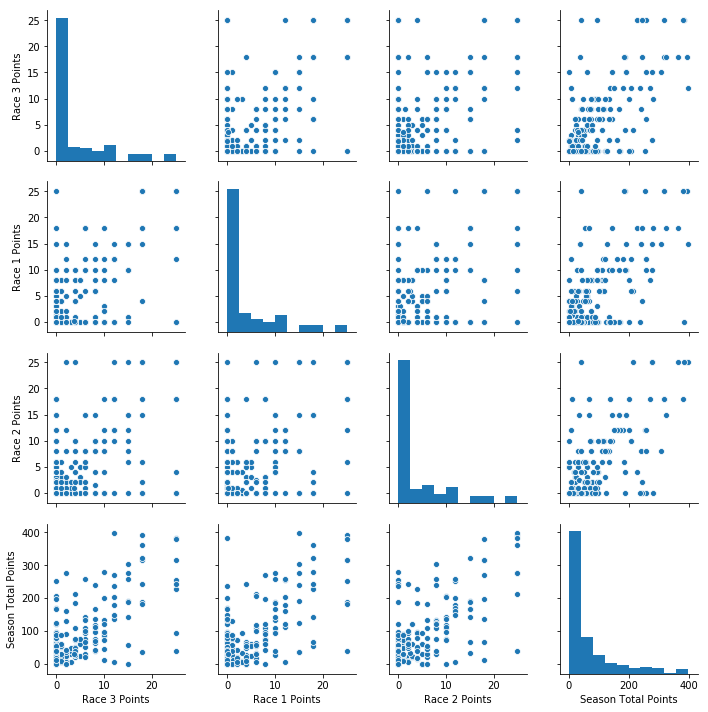

In [223]:
#plot = sns.pairplot(df);
# plot.savefig("pairplots.svg")

In [707]:
l1resids = y_te - l1.predict(X_te)

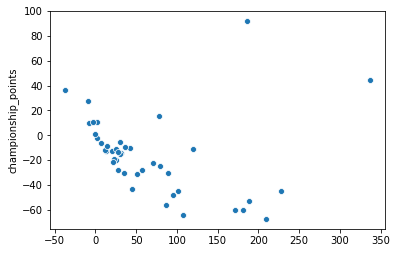

In [708]:
sns.scatterplot(l1.predict(X_te), l1resids)

In [709]:
l2resids = y_te - l2.predict(X_te)

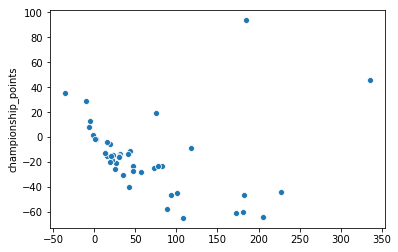

In [710]:
sns.scatterplot(l2.predict(X_te), l2resids)

In [711]:
lrresids = y_te - lr.predict(X_te)

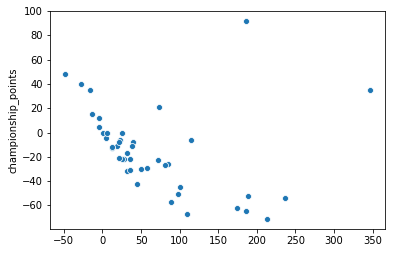

In [712]:
sns.scatterplot(lr.predict(X_te), lrresids)

In [279]:
df.to_csv('f1_2006_2017_model_KNN_v1.1.csv')